# Curating a data set for elastic $(p,p)$ and $(n,n)$ scattering for multiple isotopes

 We will make use of the class `TargetData` class in `exfor_tools.curate`

In [1]:
import numpy as np
from periodictable import elements

from exfor_tools import curate, quantities

Using database version X4-2024-12-31 located in: /home/beyerk/db/exfor/unpack_exfor-2024/X4-2024-12-31


In [2]:
print(quantities)

['dXS/dA', 'dXS/dRuth', 'Ay']


In [3]:
Ca48 = (48, 20)
Ca40 = (40, 20)

neutron = (1, 0)
proton = (1, 1)

In [4]:
energy_range = [10, 200]
min_num_points = 5

# if normalization uncertainty isn't reported assign it to be 5%
default_systematic_normalization_err = 0.05

settings = {
    "vocal": True,
    "Einc_range": energy_range,
    "filter_kwargs": {"min_num_pts": min_num_points},
}

In [5]:
query_arguments = []
for target in [Ca40, Ca48]:
    # neutron elastic differential cross sections
    query_arguments.append((target, neutron, "dXS/dA", settings))
    # proton elastic differential cross sections (absolute)
    query_arguments.append((target, proton, "dXS/dA", settings))
    # proton lastic differential cross sections (ratio to Rutherford)
    query_arguments.append((target, proton, "dXS/dRuth", settings))
query_arguments

[((40, 20),
  (1, 0),
  'dXS/dA',
  {'vocal': True,
   'Einc_range': [10, 200],
   'filter_kwargs': {'min_num_pts': 5}}),
 ((40, 20),
  (1, 1),
  'dXS/dA',
  {'vocal': True,
   'Einc_range': [10, 200],
   'filter_kwargs': {'min_num_pts': 5}}),
 ((40, 20),
  (1, 1),
  'dXS/dRuth',
  {'vocal': True,
   'Einc_range': [10, 200],
   'filter_kwargs': {'min_num_pts': 5}}),
 ((48, 20),
  (1, 0),
  'dXS/dA',
  {'vocal': True,
   'Einc_range': [10, 200],
   'filter_kwargs': {'min_num_pts': 5}}),
 ((48, 20),
  (1, 1),
  'dXS/dA',
  {'vocal': True,
   'Einc_range': [10, 200],
   'filter_kwargs': {'min_num_pts': 5}}),
 ((48, 20),
  (1, 1),
  'dXS/dRuth',
  {'vocal': True,
   'Einc_range': [10, 200],
   'filter_kwargs': {'min_num_pts': 5}})]

In [20]:
class AngularDataCorpus:
    r"""Queries, parses and stores differential cross sections and
    analyzing powers for multiple reactions from EXFOR, storing them
    as nested dicts from target -> projectile -> quantity
    """

    def __init__(
        self,
        targets: list[tuple],
        projectiles: list[tuple],
        quantities: list[str],
        settings: list[dict],
    ):
        self.targets = targets
        self.projectiles = projectiles
        self.quantities = quantities
        self.settings = settings
        self.data = {}

        for target, projectile, quantity, kwargs in zip(
            targets, projectiles, quantities, settings
        ):
            entries = curate.ReactionAngularData(
                target,
                projectile,
                quantity,
                **kwargs,
            )

            if target in self.data:
                if projectile in self.data[target]:
                    self.data[target][projectile][quantity] = entries
                else:
                    self.data[target][projectile] = {quantity: entries}
            else:
                self.data[target] = {projectile: {quantity: entries}}

        # handle duplicates between absolute angular cross sections and ratio to Rutherford
        for target in self.data.keys():
            for projectile in self.data[target].keys():
                if projectile[1] > 0:
                    quantities = self.data[target][projectile]
                    if "dXS/dA" in quantities and "dXS/dRuth" in quantities:
                        if (
                            quantities["dXS/dA"].settings
                            == quantities["dXS/dRuth"].settings
                        ):
                            curate.remove_duplicates(
                                *target,
                                quantities["dXS/dRuth"].entries,
                                quantities["dXS/dA"].entries,
                            )
                            curate.remove_duplicates(
                                *target,
                                quantities["dXS/dRuth"].failed_parses,
                                quantities["dXS/dA"].failed_parses,
                            )

    def to_json(self):
        pass

In [21]:
corpus = AngularDataCorpus(*zip(*query_arguments))


Now parsing dXS/dA for $^{40}$Ca$(n,n)_{}$

Found subentry 12785002 with the following columns:
['EN', 'EN-RSL', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry 12996002 with the following columns:
['EN', 'EN-RSL', 'ANG-CM', 'DATA', 'DATA-ERR']
Found subentry 13946003 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'ERR-S', 'ERR-SYS']
Found subentry 14303002 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry 14303003 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']

Succesfully parsed 4 entries
Failed to parse 0 entries:


Now parsing dXS/dA for $^{40}$Ca$(p,p)_{}$

Found subentry C0076002 with the following columns:
['E-RSL', 'EN', 'ANG-CM', 'DATA-CM', 'ERR-S']
Found subentry C0078002 with the following columns:
['EN-ERR', 'EN-RSL-FW', 'EN', 'ANG-CM', 'DATA-CM', 'ERR-T']
Found subentry C0624002 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM'

In [23]:
corpus.data

{(40,
  20): {(1,
   0): {'dXS/dA': <exfor_tools.curate.ReactionAngularData at 0x76653876e550>}, (1,
   1): {'dXS/dA': <exfor_tools.curate.ReactionAngularData at 0x76653876f2d0>,
   'dXS/dRuth': <exfor_tools.curate.ReactionAngularData at 0x766536b67a50>}},
 (48,
  20): {(1,
   0): {'dXS/dA': <exfor_tools.curate.ReactionAngularData at 0x76653876f250>}, (1,
   1): {'dXS/dA': <exfor_tools.curate.ReactionAngularData at 0x7665365a0810>,
   'dXS/dRuth': <exfor_tools.curate.ReactionAngularData at 0x7665367d53d0>}}}

## Querying EXFOR

Wow, that's a lot of information! 

## Let's step through the failed parses one by one:

### $^{48}$Ca

In [24]:
curate.print_failed_parses(corpus.data[Ca48][neutron]['dXS/dA'].failed_parses)

In [26]:
curate.print_failed_parses(corpus.data[Ca48][proton]['dXS/dRuth'].failed_parses)

In [27]:
curate.print_failed_parses(corpus.data[Ca48][proton]['dXS/dA'].failed_parses)

Entry: C0624
C0624005  :  Ambiguous statistical error labels:
ERR-SYS, ERR-7, ERR-9, DATA-ERR


In [28]:
corpus.data[Ca48][proton]['dXS/dA'].reattempt_parse(
    "C0624",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["ERR-SYS"],
    },
)

Found subentry C0624005 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']


(-5.0, 220.0)

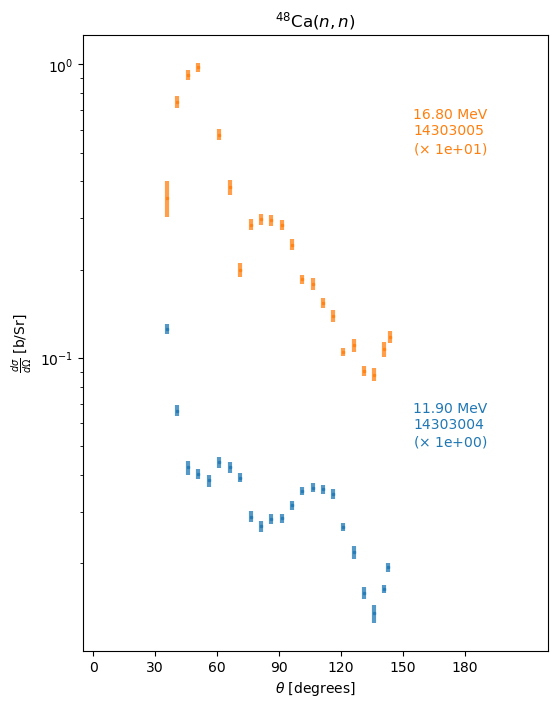

In [29]:
axes = corpus.data[Ca48][neutron]['dXS/dA'].plot(
    label_kwargs={"label_exfor": True, "label_offset_factor": 0.05},
    plot_kwargs={"offsets": 10},
    y_size=8,
)
axes[0].set_xlim([-5, 220])

(-5.0, 220.0)

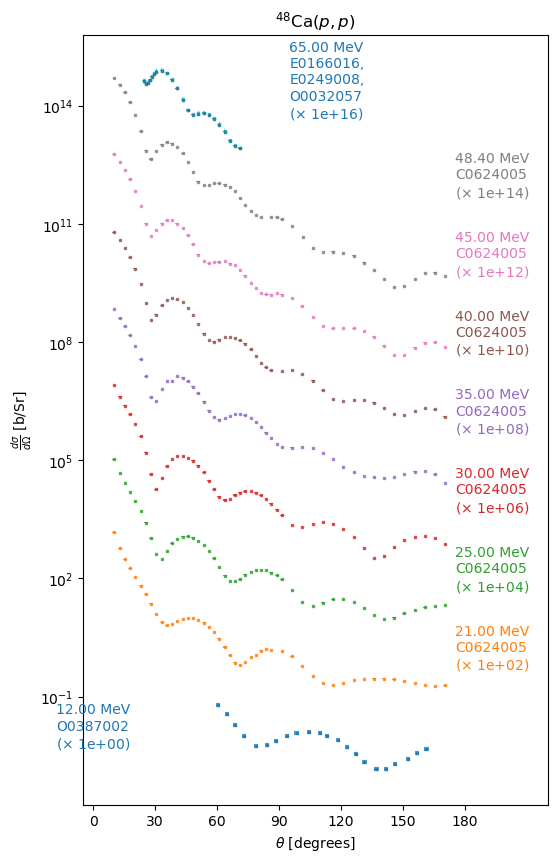

In [9]:
axes = data_by_target[48, 20].pp_abs.plot(
    label_kwargs={"label_exfor": True, "label_offset_factor": 0.005},
    plot_kwargs={"offsets": 100},
)
axes[0].set_xlim([-5, 220])

(-5.0, 220.0)

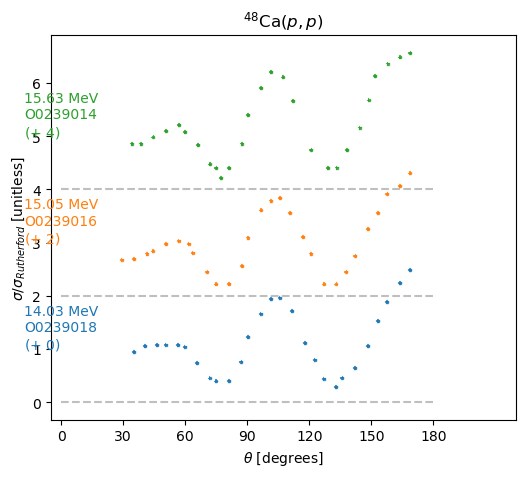

In [10]:
axes = data_by_target[48, 20].pp_ratio.plot(
    label_kwargs={"label_exfor": True, "label_offset_factor": 1},
    plot_kwargs={"offsets": 2, "log": False, "draw_baseline": True},
    y_size=5,
)
axes[0].set_xlim([-5, 220])

## $^{40}$Ca

In [11]:
curate.print_failed_parses(data_by_target[40, 20].nn.failed_parses)

In [12]:
curate.print_failed_parses(data_by_target[40, 20].pp_ratio.failed_parses)

Entry: E1677
E1677016  :  Ambiguous statistical error labels:
+DATA-ERR, -DATA-ERR
Entry: O0211
O0211004  :  Ambiguous statistical error labels:
DATA-ERR, ERR-T
Entry: O0253
O0253017  :  Ambiguous statistical error labels:
ERR-1, ERR-2, ERR-3, ERR-DIG
Entry: O0302
O0302004  :  Ambiguous statistical error labels:
DATA-ERR1, DATA-ERR2, ERR-DIG


In [13]:
data_by_target[40, 20].pp_ratio.reattempt_parse(
    "E1677",
    parsing_kwargs={
        "statistical_err_labels": ["+DATA-ERR", "-DATA-ERR"],
        "statistical_err_treatment": "difference",
    },
)

Found subentry E1677016 with the following columns:
['EN', 'ANG-CM', 'DATA', '+DATA-ERR', '-DATA-ERR']


In [14]:
data_by_target[40, 20].pp_ratio.reattempt_parse(
    "O0211",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR", "ERR-T"],
    },
)

Found subentry O0211004 with the following columns:
['EN', 'EN-RSL', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']


In [15]:
data_by_target[40, 20].pp_ratio.reattempt_parse(
    "O0253",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-1", "ERR-DIG"],
        "systematic_err_labels": ["ERR-2"],
    },
)

Found subentry O0253017 with the following columns:
['EN-ERR', 'ERR-1', 'ERR-2', 'ERR-3', 'ANG-ERR-D', 'ERR-DIG', 'EN', 'ANG-CM', 'DATA']


In [16]:
data_by_target[40, 20].pp_ratio.reattempt_parse(
    "O0302",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1", "ERR-DIG"],
        "systematic_err_labels": ["DATA-ERR2"],
    },
)

Found subentry O0302004 with the following columns:
['EN', 'DATA-ERR1', 'DATA-ERR2', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA']


In [17]:
del data_by_target[40, 20].pp_ratio.entries["E0120"]  # no errors reported

In [18]:
curate.print_failed_parses(data_by_target[40, 20].pp_abs.failed_parses)

Entry: C0624
C0624002  :  Ambiguous statistical error labels:
ERR-SYS, ERR-7, ERR-9, DATA-ERR
Entry: O0049
O0049004  :  Ambiguous statistical error labels:
MONIT-ERR, ERR-T, ERR-DIG
Entry: O0142
O0142004  :  Ambiguous statistical error labels:
ERR-1, ERR-T
Entry: O0208
O0208006  :  Ambiguous statistical error labels:
ERR-1, ERR-2
Entry: O0253
O0253002  :  Ambiguous statistical error labels:
ERR-1, ERR-2, ERR-3, ERR-DIG
Entry: O0382
O0382002  :  Ambiguous statistical error labels:
DATA-ERR, ERR-T
Entry: T0101
T0101002  :  Ambiguous statistical error labels:
DATA-ERR1, DATA-ERR


In [19]:
data_by_target[40, 20].pp_abs.reattempt_parse(
    "C0624",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["ERR-SYS"],
    },
)

Found subentry C0624002 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']


In [20]:
data_by_target[40, 20].pp_abs.reattempt_parse(
    "O0049",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-DIG", "ERR-T"],
        "systematic_err_labels": ["MONIT-ERR"],
    },
)

Found subentry O0049004 with the following columns:
['EN', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ERR-T', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM']


In [21]:
data_by_target[40, 20].pp_abs.reattempt_parse(
    "O0142",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0142004 with the following columns:
['EN', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [22]:
data_by_target[40, 20].pp_abs.reattempt_parse(
    "O0208",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-2"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0208006 with the following columns:
['EN', 'ERR-1', 'ANG-ERR', 'ANG-CM', 'DATA-CM', 'ERR-2']


In [23]:
data_by_target[40, 20].pp_abs.reattempt_parse(
    "O0253",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-1", "ERR-DIG"],
        "systematic_err_labels": ["ERR-2"],
    },
)

Found subentry O0253002 with the following columns:
['EN-ERR', 'ERR-1', 'ERR-2', 'ERR-3', 'ANG-ERR-D', 'ERR-DIG', 'EN', 'ANG-CM', 'DATA-CM']


In [24]:
data_by_target[40, 20].pp_abs.reattempt_parse(
    "O0382",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T", "DATA-ERR"],
    },
)

Found subentry O0382002 with the following columns:
['EN', 'EN-RSL-FW', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [25]:
data_by_target[40, 20].pp_abs.reattempt_parse(
    "T0101",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["DATA-ERR1"],
    },
)

Found subentry T0101002 with the following columns:
['DATA-ERR1', 'EN', 'ANG-CM', 'DATA', 'DATA-ERR']


(-20.0, 30.0)

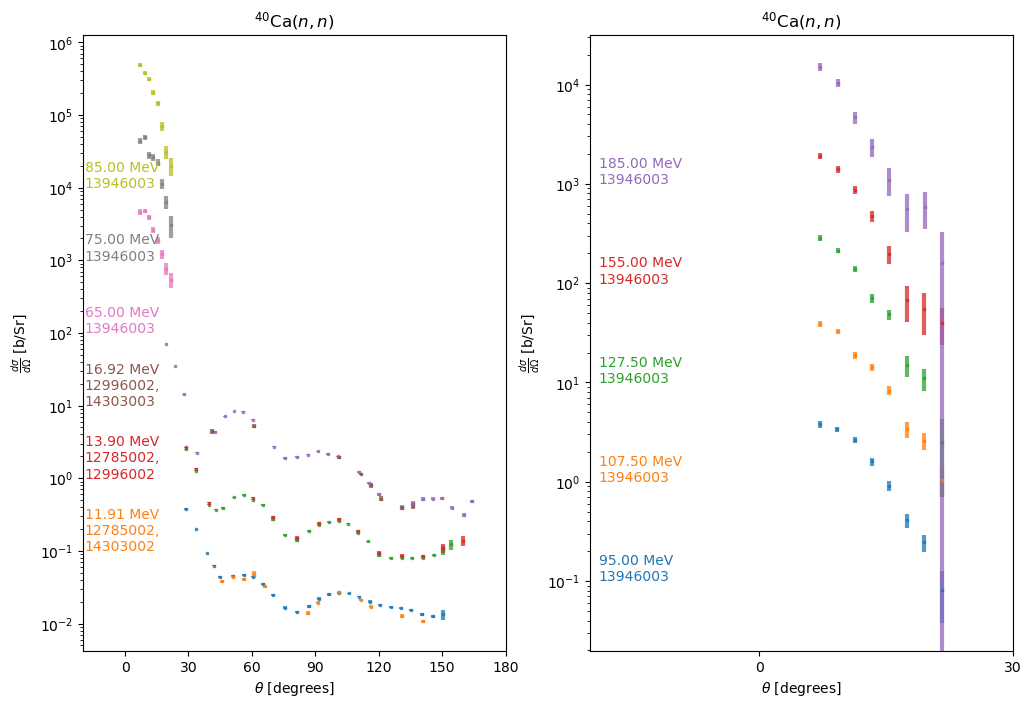

In [26]:
axes = data_by_target[40, 20].nn.plot(
    n_per_plot=6,
    label_kwargs={
        "label_xloc_deg": -19,
        "label_offset_factor": 0.1,
        "label_energy_err": False,
        "label_offset": False,
        "label_incident_energy": True,
        "label_excitation_energy": False,
        "label_exfor": True,
    },
    plot_kwargs={"offsets": 10},
    y_size=8,
)
axes[0].set_xlim([-20, 180])
axes[1].set_xlim([-20, 30])

[(-5.0, 220.0), (-5.0, 220.0), (-5.0, 220.0), (-5.0, 220.0)]

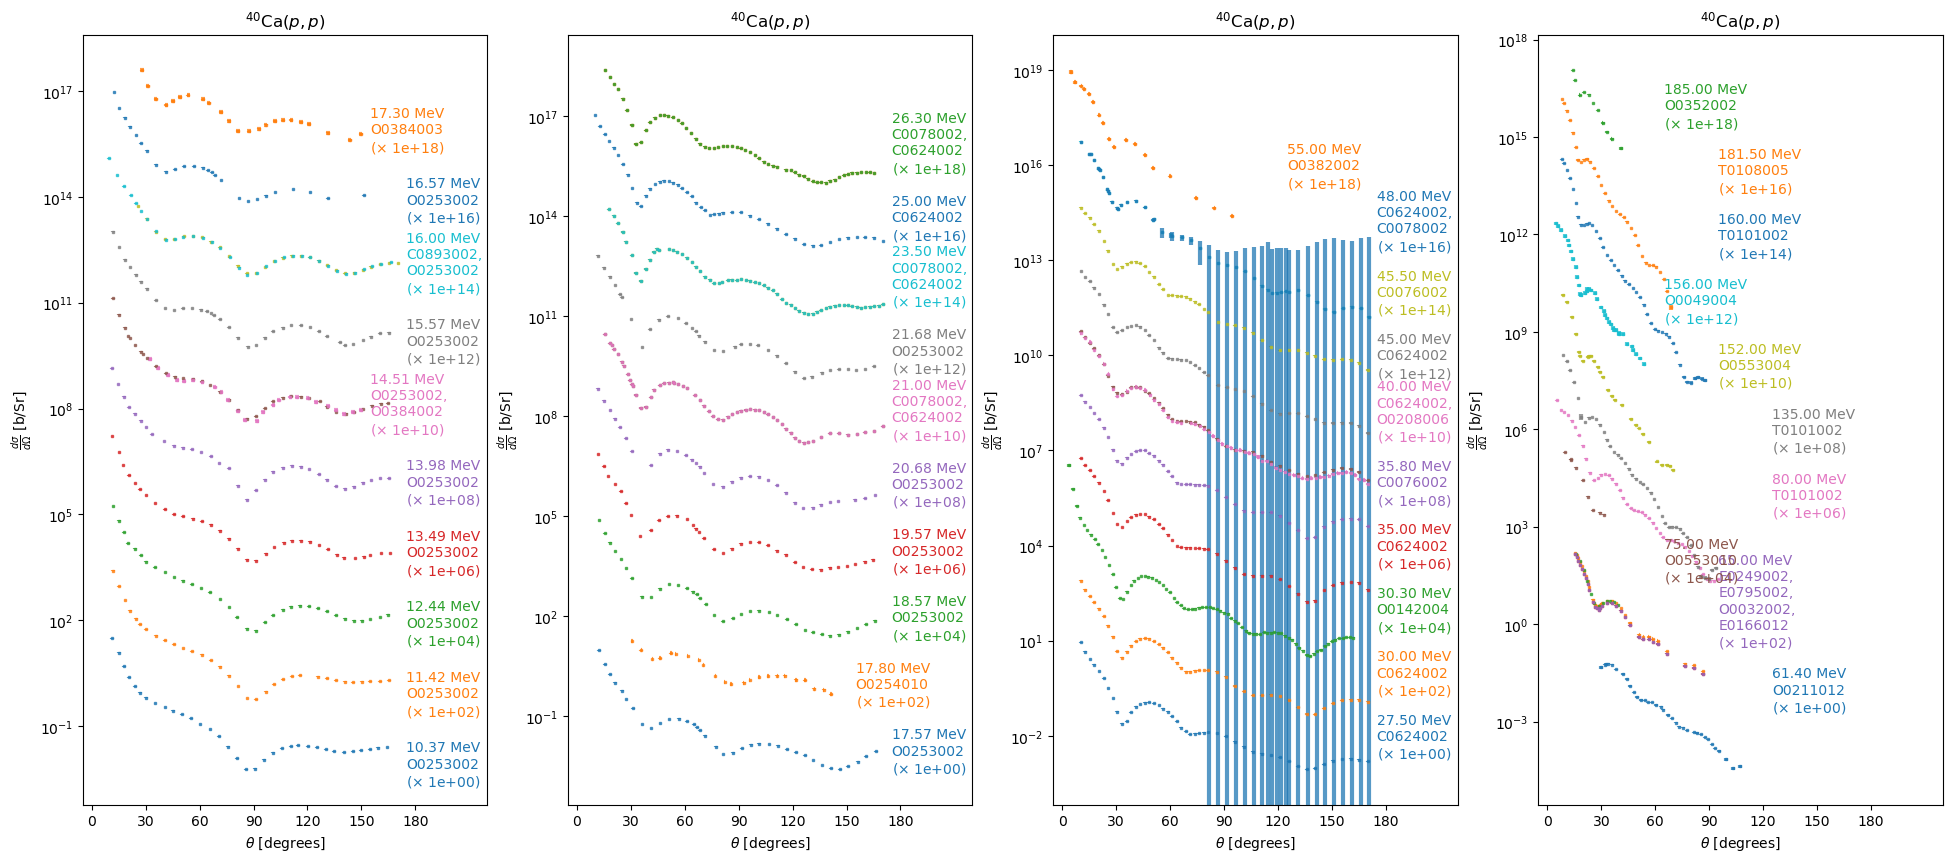

In [27]:
axes = data_by_target[40, 20].pp_abs.plot(
    n_per_plot=10,
    label_kwargs={
        "label_xloc_deg": None,
        "label_offset_factor": 0.002,
        "label_offset": True,
        "label_exfor": True,
    },
    plot_kwargs={"offsets": 100},
    y_size=10,
)
[a.set_xlim([-5, 220]) for a in axes]

In [28]:
# Exclusions:
del data_by_target[40, 20].pp_abs.entries["C0078"]  # redundant, huge uncertainties
del data_by_target[40, 20].pp_abs.entries["E0795"]  # duplicate, no uncertainties
del data_by_target[40, 20].pp_abs.entries["O0032"]  # duplicate to E0166 and E0249
del data_by_target[40, 20].pp_abs.entries["E0249"]  # duplicate to E0166 and O0032
del data_by_target[40, 20].pp_abs.entries["O0253"]
# duplicate to Rutherford from same entry, some data shows Compound Elastic effects per original paper

[(-5.0, 220.0), (-5.0, 220.0), (-5.0, 220.0)]

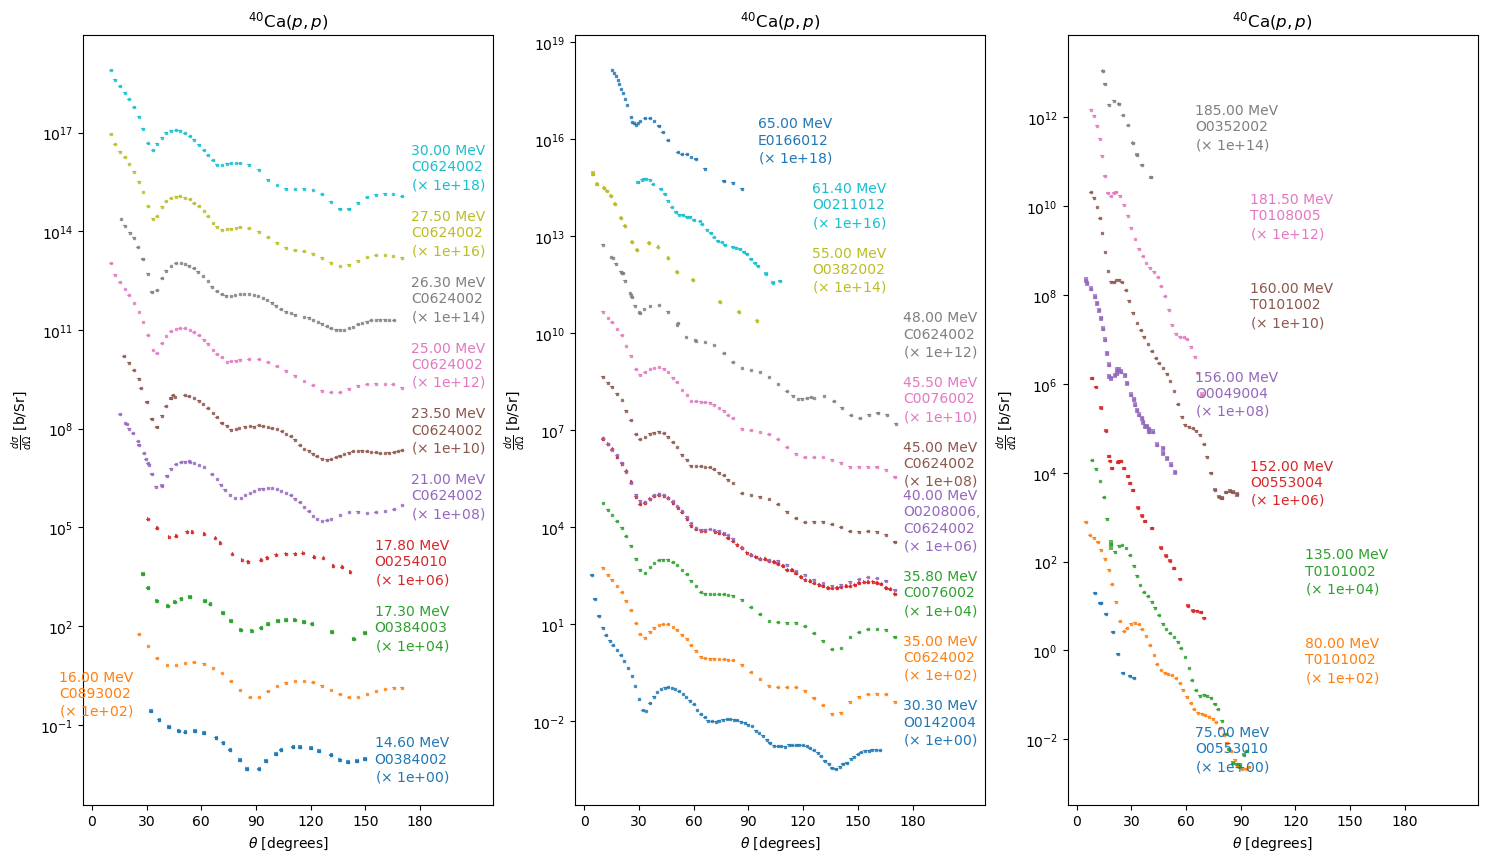

In [29]:
axes = data_by_target[40, 20].pp_abs.plot(
    n_per_plot=10,
    label_kwargs={
        "label_xloc_deg": None,
        "label_offset_factor": 0.002,
        "label_offset": True,
        "label_exfor": True,
    },
    plot_kwargs={"offsets": 100},
    y_size=10,
)
[a.set_xlim([-5, 220]) for a in axes]

[(-5.0, 220.0), (-5.0, 220.0)]

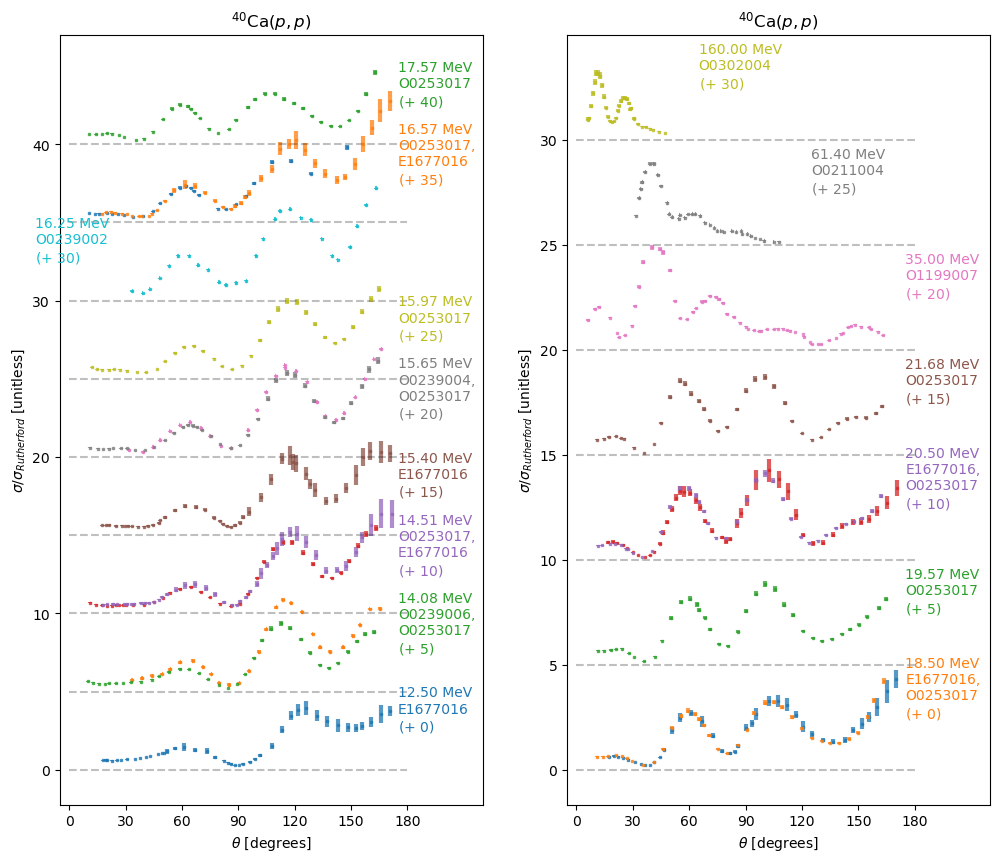

In [30]:
axes = data_by_target[40, 20].pp_ratio.plot(
    n_per_plot=9,
    label_kwargs={
        "label_xloc_deg": None,
        "label_offset_factor": 2.5,
        "label_offset": True,
        "label_exfor": True,
    },
    plot_kwargs={"offsets": 5, "log": False, "draw_baseline": True},
    y_size=10,
)
[a.set_xlim([-5, 220]) for a in axes]

## Now let's take a look at some attributes of the data
By cross-referencing by entry, we can see what the common systematic errors are for single experiments with multiple isotopes, which can be very useful in evaluation, ccalibration and UQ.

In [31]:
data_by_entry = curate.cross_reference_entries(data_by_target)

In [32]:
for entry, data in data_by_entry.items():
    entry_systematic_norm_err = []
    for d in data:
        for m in d.measurements:
            if m.systematic_norm_err == 0:
                m.systematic_norm_err = default_systematic_normalization_err
            entry_systematic_norm_err.append(m.systematic_norm_err)

    # ensure we've properly parsed systematic normalization err
    print(
        entry,
        [f"{100*f:1.1f}%" for f in entry_systematic_norm_err],
        np.all(np.isclose(entry_systematic_norm_err, entry_systematic_norm_err[0])),
    )

14303 ['5.0%', '5.0%', '5.0%', '5.0%'] True
O0239 ['5.0%', '5.0%', '5.0%', '5.0%', '5.0%', '5.0%'] True
E0166 ['5.0%', '5.0%'] True
E0249 ['5.0%'] True
O0032 ['5.0%'] True
O0387 ['5.0%'] True
C0624 ['3.0%', '3.0%', '3.0%', '3.0%', '3.0%', '3.0%', '3.0%', '3.0%', '3.0%', '3.0%', '3.0%', '3.0%', '3.0%', '3.0%', '3.0%', '3.0%', '3.0%'] True
12785 ['5.0%', '5.0%'] True
12996 ['5.0%', '5.0%'] True
13946 ['5.0%', '5.0%', '5.0%', '5.0%', '5.0%', '5.0%', '5.0%', '5.0%'] True
O1199 ['5.0%'] True
E1677 ['5.0%', '5.0%', '5.0%', '5.0%', '5.0%', '5.0%'] True
O0211 ['5.0%', '5.0%'] True
O0253 ['5.0%', '5.0%', '5.0%', '5.0%', '5.0%', '5.0%', '5.0%', '5.0%', '5.0%', '5.0%'] True
O0302 ['7.0%'] True
C0076 ['5.0%', '5.0%'] True
C0893 ['5.0%'] True
O0254 ['5.0%'] True
O0352 ['5.0%'] True
O0384 ['5.0%', '5.0%'] True
O0553 ['5.0%', '5.0%'] True
T0108 ['5.0%'] True
O0049 ['5.0%'] True
O0142 ['3.0%'] True
O0208 ['5.0%'] True
O0382 ['5.0%'] True
T0101 ['10.0%', '10.0%', '10.0%'] True


In [33]:
for entry, data in data_by_entry.items():
    print(data[0].rxn)

$^{48}$Ca$(n,n)_{}$
$^{48}$Ca$(p,p)_{}$
$^{48}$Ca$(p,p)_{}$
$^{48}$Ca$(p,p)_{}$
$^{48}$Ca$(p,p)_{}$
$^{48}$Ca$(p,p)_{}$
$^{48}$Ca$(p,p)_{}$
$^{40}$Ca$(n,n)_{}$
$^{40}$Ca$(n,n)_{}$
$^{40}$Ca$(n,n)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
$^{40}$Ca$(p,p)_{}$
